Models for Y1 and Y2 trained successfully.
--- Model Performance for Y1 ---
Linear Regression - MSE: 9.1532, R2: 0.9122
Decision Tree - MSE: 0.3852, R2: 0.9963
Random Forest - MSE: 0.2409, R2: 0.9977
Gradient Boosting - MSE: 0.2653, R2: 0.9975

--- Model Performance for Y2 ---
Linear Regression - MSE: 9.8934, R2: 0.8932
Decision Tree - MSE: 4.0692, R2: 0.9561
Random Forest - MSE: 0.9683, R2: 0.9683
Gradient Boosting - MSE: 2.2898, R2: 0.9753


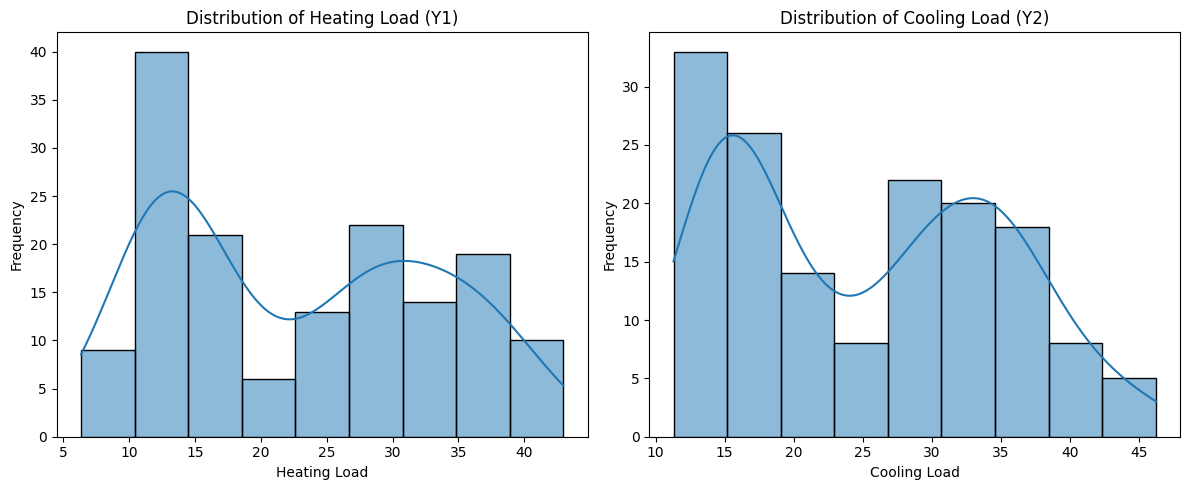

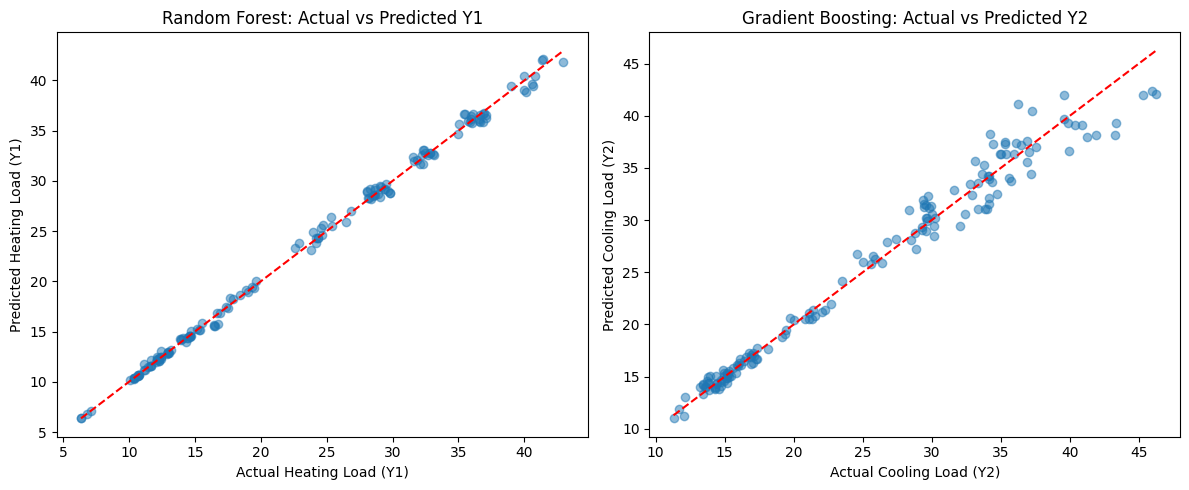

In [16]:
import zipfile
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the data
zip_file_path = '/content/Group_H_Building_Energy_Efficiency_Prediction.zip'
extract_dir = '/content/'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Load the data
df = pd.read_csv('/content/ENB2012_data.csv')

# Data cleaning and preprocessing
X = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
y = df[['Y1', 'Y2']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model selection and training

# Instantiate models for Y1
lr_model_y1 = LinearRegression()
dt_model_y1 = DecisionTreeRegressor(random_state=42)
rf_model_y1 = RandomForestRegressor(random_state=42)
gb_model_y1 = GradientBoostingRegressor(random_state=42)

# Instantiate models for Y2
lr_model_y2 = LinearRegression()
dt_model_y2 = DecisionTreeRegressor(random_state=42)
rf_model_y2 = RandomForestRegressor(random_state=42)
gb_model_y2 = GradientBoostingRegressor(random_state=42)


# Train models for Y1
lr_model_y1.fit(X_train, y_train['Y1'])
dt_model_y1.fit(X_train, y_train['Y1'])
rf_model_y1.fit(X_train, y_train['Y1'])
gb_model_y1.fit(X_train, y_train['Y1'])

# Train models for Y2
lr_model_y2.fit(X_train, y_train['Y2'])
dt_model_y2.fit(X_train, y_train['Y2'])
rf_model_y2.fit(X_train, y_train['Y2'])
gb_model_y2.fit(X_train, y_train['Y2'])

print("Models for Y1 and Y2 trained successfully.")

# Model evaluation

# Make predictions on the test set for Y1
y1_pred_lr = lr_model_y1.predict(X_test)
y1_pred_dt = dt_model_y1.predict(X_test)
y1_pred_rf = rf_model_y1.predict(X_test)
y1_pred_gb = gb_model_y1.predict(X_test)

# Make predictions on the test set for Y2
y2_pred_lr = lr_model_y2.predict(X_test)
y2_pred_dt = dt_model_y2.predict(X_test)
y2_pred_rf = rf_model_y2.predict(X_test)
y2_pred_gb = gb_model_y2.predict(X_test)

# Calculate MSE for Y1
mse_y1_lr = mean_squared_error(y_test['Y1'], y1_pred_lr)
mse_y1_dt = mean_squared_error(y_test['Y1'], y1_pred_dt)
mse_y1_rf = mean_squared_error(y_test['Y1'], y1_pred_rf)
mse_y1_gb = mean_squared_error(y_test['Y1'], y1_pred_gb)

# Calculate MSE for Y2
mse_y2_lr = mean_squared_error(y_test['Y2'], y2_pred_lr)
mse_y2_dt = mean_squared_error(y_test['Y2'], y2_pred_dt)
mse_y2_rf = mean_squared_error(y_test['Y2'], y2_pred_rf)
mse_y2_gb = mean_squared_error(y_test['Y2'], y2_pred_gb)

# Calculate R2 for Y1
r2_y1_lr = r2_score(y_test['Y1'], y1_pred_lr)
r2_y1_dt = r2_score(y_test['Y1'], y1_pred_dt)
r2_y1_rf = r2_score(y_test['Y1'], y1_pred_rf)
r2_y1_gb = r2_score(y_test['Y1'], y1_pred_gb)

# Calculate R2 for Y2
r2_y2_lr = r2_score(y_test['Y2'], y2_pred_lr)
r2_y2_dt = r2_score(y_test['Y2'], y2_pred_dt)
r2_y2_rf = r2_score(y_test['Y2'], y2_pred_rf)
r2_y2_gb = r2_score(y_test['Y2'], y2_pred_gb)

# Print performance metrics
print("--- Model Performance for Y1 ---")
print(f"Linear Regression - MSE: {mse_y1_lr:.4f}, R2: {r2_y1_lr:.4f}")
print(f"Decision Tree - MSE: {mse_y1_dt:.4f}, R2: {r2_y1_dt:.4f}")
print(f"Random Forest - MSE: {mse_y1_rf:.4f}, R2: {r2_y1_rf:.4f}")
print(f"Gradient Boosting - MSE: {mse_y1_gb:.4f}, R2: {r2_y1_gb:.4f}")

print("\n--- Model Performance for Y2 ---")
print(f"Linear Regression - MSE: {mse_y2_lr:.4f}, R2: {r2_y2_lr:.4f}")
print(f"Decision Tree - MSE: {mse_y2_dt:.4f}, R2: {r2_y2_dt:.4f}")
print(f"Random Forest - MSE: {r2_y2_rf:.4f}, R2: {r2_y2_rf:.4f}")
print(f"Gradient Boosting - MSE: {mse_y2_gb:.4f}, R2: {r2_y2_gb:.4f}")

# Data Visualization

# Visualize the distribution of the target variables (Y1 and Y2)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(y_test['Y1'], kde=True)
plt.title('Distribution of Heating Load (Y1)')
plt.xlabel('Heating Load')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(y_test['Y2'], kde=True)
plt.title('Distribution of Cooling Load (Y2)')
plt.xlabel('Cooling Load')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Scatter plot of Actual vs Predicted values for Y1 (Random Forest)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test['Y1'], y1_pred_rf, alpha=0.5)
plt.plot([y_test['Y1'].min(), y_test['Y1'].max()], [y_test['Y1'].min(), y_test['Y1'].max()], 'r--')
plt.xlabel('Actual Heating Load (Y1)')
plt.ylabel('Predicted Heating Load (Y1)')
plt.title('Random Forest: Actual vs Predicted Y1')

# Scatter plot of Actual vs Predicted values for Y2 (Gradient Boosting)
plt.subplot(1, 2, 2)
plt.scatter(y_test['Y2'], y2_pred_gb, alpha=0.5)
plt.plot([y_test['Y2'].min(), y_test['Y2'].max()], [y_test['Y2'].min(), y_test['Y2'].max()], 'r--')
plt.xlabel('Actual Cooling Load (Y2)')
plt.ylabel('Predicted Cooling Load (Y2)')
plt.title('Gradient Boosting: Actual vs Predicted Y2')

plt.tight_layout()
plt.show()